<h1 style="text-align: center;"> Proyecto Final </h1>
<h2 style="text-align: center;"> Data Mining & Machine Learning </h2>
<h4 style="text-align: center;"> Catedrático: Ing. José Antonio Medrano </h3>
<h4 style="text-align: center;"> Integrantes: Juan M. González-Campo 21077, Pedro Marroquín 21801 & Raúl Sánchez 21401 </h3>

## Análisis Exploratorio

In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as npcoach
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Leemos los datos
data = pd.read_csv('card_transdata.csv')

In [3]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


### Distribución de datos

Text(0.5, 1.0, 'Distribution distance from last transaction')

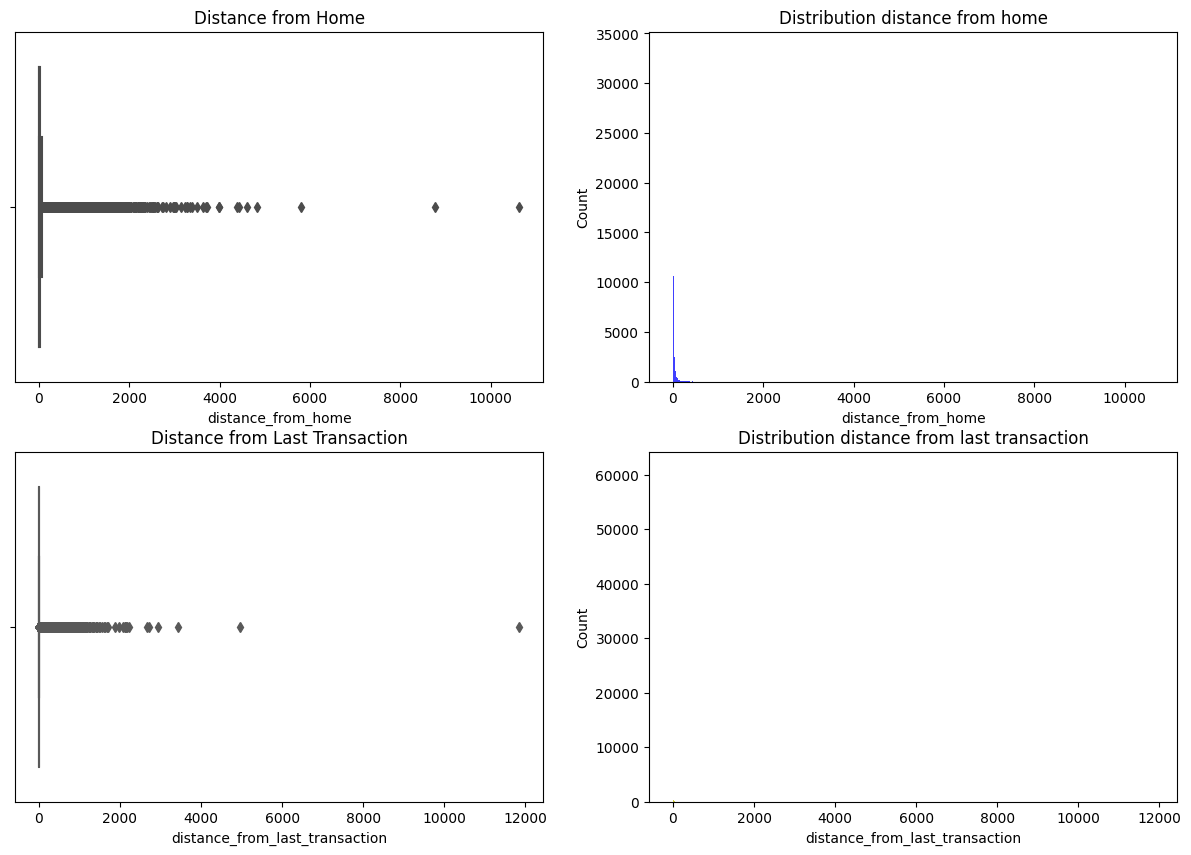

In [6]:
fig,axes= plt.subplots(2,2, figsize=(15,10))
sns.boxplot(ax=axes[0,0],x=data["distance_from_home"], palette="Set1")
axes[0,0].set_title("Distance from Home")

sns.histplot(ax=axes[0,1],x=data["distance_from_home"], color="b")
axes[0,1].set_title("Distribution distance from home")

sns.boxplot(ax=axes[1,0],x=data.iloc[:,1], palette="Set2")
axes[1,0].set_title("Distance from Last Transaction")

sns.histplot(ax=axes[1,1],x=data.iloc[:,1], color="y")
axes[1,1].set_title("Distribution distance from last transaction")


Text(0.5, 1.0, 'Distribution distance from last transaction')

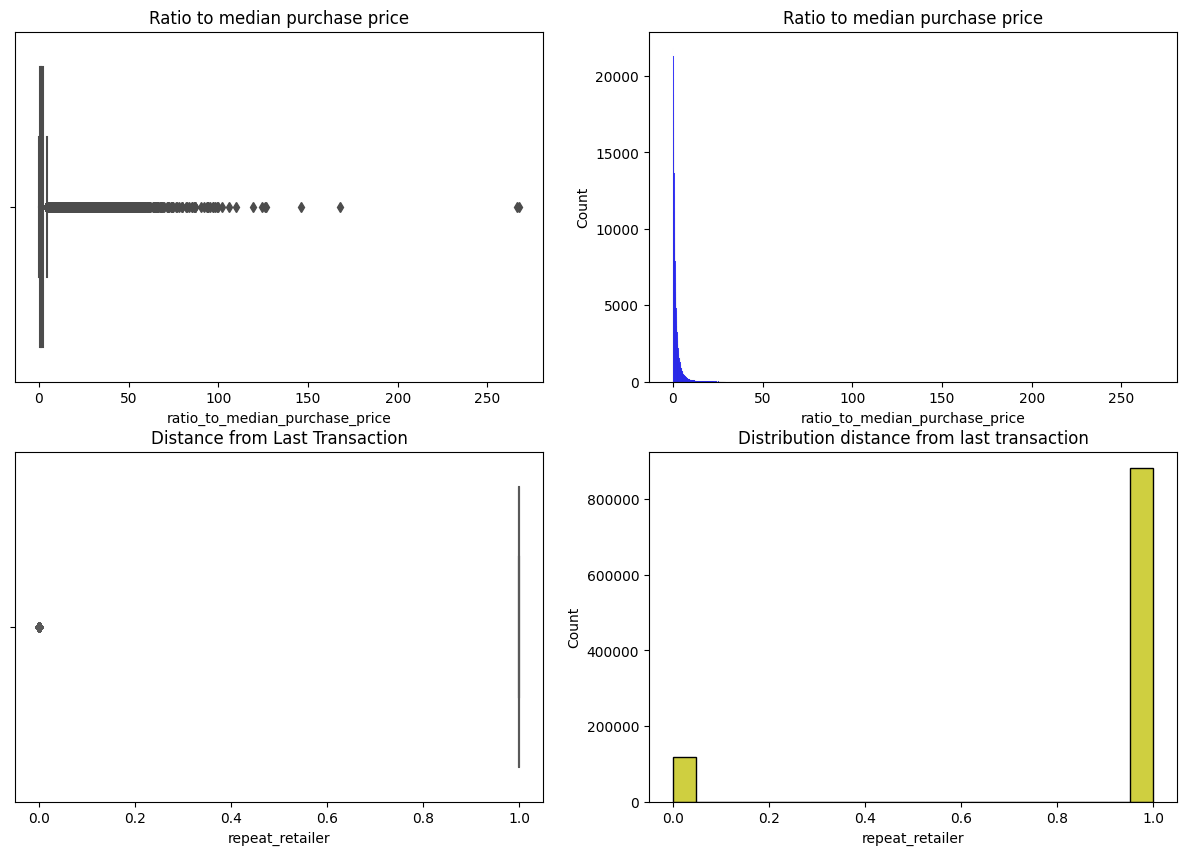

In [7]:
fig,axes= plt.subplots(2,2, figsize=(15,10))
sns.boxplot(ax=axes[0,0],x=data.iloc[:,2], palette="Set1")
axes[0,0].set_title("Ratio to median purchase price")

sns.histplot(ax=axes[0,1],x=data.iloc[:,2], color="b")
axes[0,1].set_title("Ratio to median purchase price")

sns.boxplot(ax=axes[1,0],x=data.iloc[:,3], palette="Set2")
axes[1,0].set_title("Distance from Last Transaction")

sns.histplot(ax=axes[1,1],x=data.iloc[:,3], color="y")
axes[1,1].set_title("Distribution distance from last transaction")

## Correlacion de variables

<AxesSubplot: >

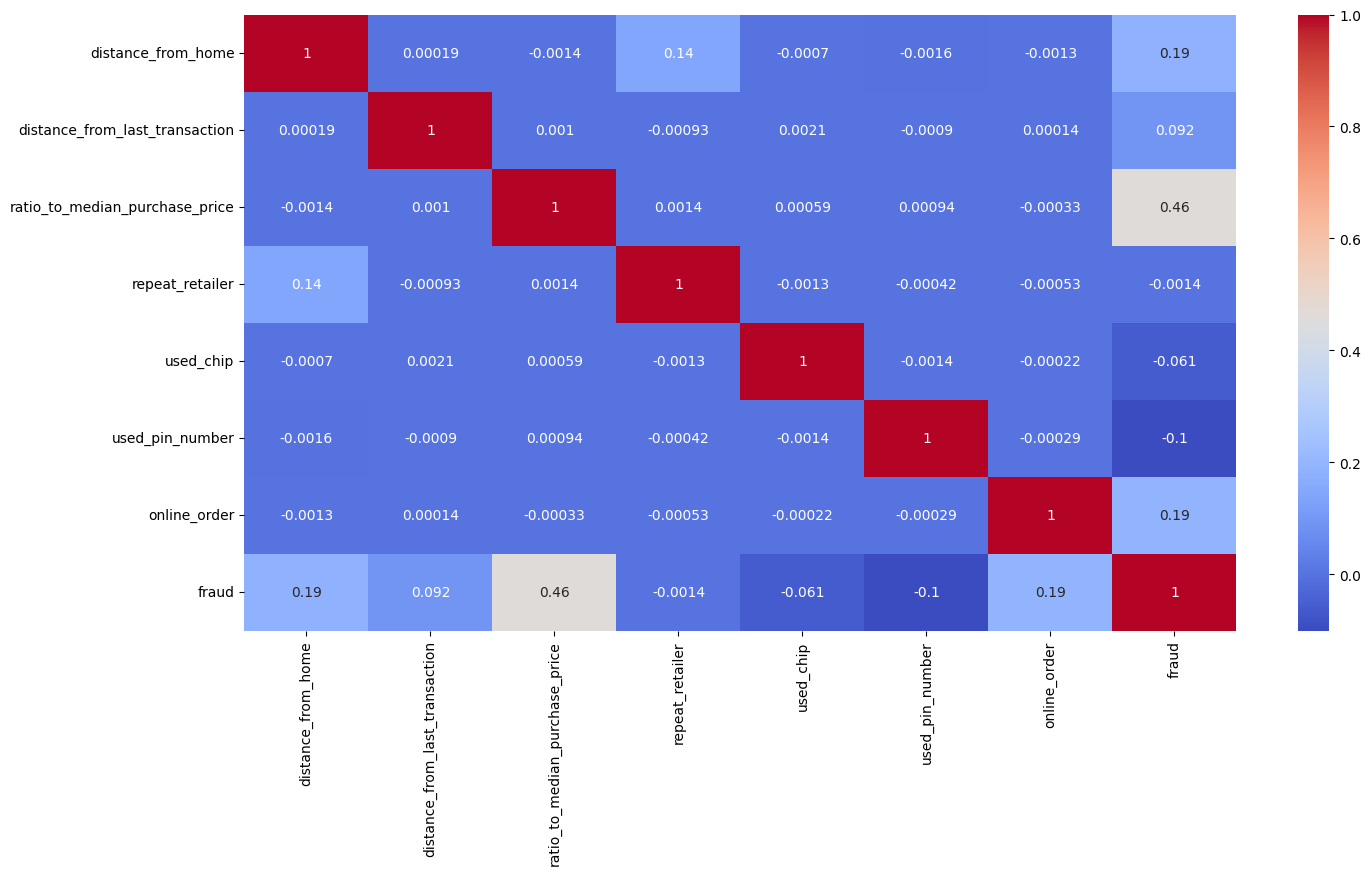

In [8]:
plt.figure(figsize=(16,8))
sns.heatmap(data=data.corr(), annot=True, cmap='coolwarm')

## Desarrollo del Modelo

### Modelo XGBClassifier

#### Particion 70/30

In [9]:
x = data.iloc[:,0:6]
y = data.iloc[:,7]
y2 = y.astype('category').cat.codes
scaler = StandardScaler()
x = scaler.fit_transform(x)
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(x, y2, test_size=test_size, stratify=y2)

In [10]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [11]:
predict = model.predict(X_train)
precision = accuracy_score(y_train, predict)
print("Precisión dentro de muestra: %.2f%%" % (precision *100))

Precisión dentro de muestra: 96.15%


In [12]:
y_pred = model.predict(X_test)
precision_test = accuracy_score(y_test, y_pred)
print("Precisión fuera de muestra: %.2f%%" % (precision_test * 100.0))

Precisión fuera de muestra: 95.95%


In [13]:
confusion_matrix(y_test, y_pred)

array([[261960,  11819],
       [   324,  25897]], dtype=int64)

In [14]:
pd.crosstab(y_test,y_pred,rownames =['real'], colnames = ['predicted'])

predicted,0,1
real,,
0,261960,11819
1,324,25897


### Particion 80/20

In [15]:
y2 = y.astype('category').cat.codes
x = data.iloc[:,0:6]
y = data.iloc[:,7]
scaler = StandardScaler()
x = scaler.fit_transform(x)
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(x, y2, test_size=test_size, stratify=y2)

In [16]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [17]:
predict = model.predict(X_train)
precision = accuracy_score(y_train, predict)
print("Precisión dentro de muestra: %.2f%%" % (precision *100))

Precisión dentro de muestra: 96.13%


In [18]:
y_pred = model.predict(X_test)
precision_test = accuracy_score(y_test, y_pred)
print("Precisión fuera de muestra: %.2f%%" % (precision_test * 100.0))

Precisión fuera de muestra: 95.94%


In [19]:
confusion_matrix(y_test, y_pred)

array([[174557,   7962],
       [   164,  17317]], dtype=int64)

In [20]:
pd.crosstab(y_test,y_pred,rownames =['real'], colnames = ['predicted'])

predicted,0,1
real,,
0,174557,7962
1,164,17317


### Eliminando variables menos correlacionadas con el fraude

#### Partición 70/30

In [51]:
#Se puede ver que las variables con menos relación son la de repear_retailer y used_chip, las eliminamos

x1 = data.drop(['repeat_retailer','used_chip','fraud'], axis=1)
y1 = data.iloc[:,7]
y3 = y1.astype('category').cat.codes
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)
test_size = 0.3
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y3, test_size=test_size, stratify=y2)

In [52]:
model1 = XGBClassifier()
model1.fit(X1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [53]:
predict1 = model1.predict(X1_train)
precision = accuracy_score(y1_train, predict1)
print("Precisión dentro de muestra: %.2f%%" % (precision *100))

Precisión dentro de muestra: 98.87%


In [54]:
y_pred = model1.predict(X1_test)
precision_test = accuracy_score(y1_test, y_pred)
print("Precisión fuera de muestra: %.2f%%" % (precision_test * 100.0))

Precisión fuera de muestra: 98.65%


In [55]:
confusion_matrix(y1_test, y_pred)

array([[270034,   3745],
       [   313,  25908]], dtype=int64)

In [56]:
pd.crosstab(y1_test,y_pred,rownames =['real'], colnames = ['predicted'])

predicted,0,1
real,,
0,270034,3745
1,313,25908


#### Partición 80/20

In [57]:
test_size = 0.2
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y3, test_size=test_size, stratify=y2)

In [58]:
model1 = XGBClassifier()
model1.fit(X1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [59]:
predict1 = model1.predict(X1_train)
precision = accuracy_score(y1_train, predict1)
print("Precisión dentro de muestra: %.2f%%" % (precision *100))

Precisión dentro de muestra: 98.84%


In [60]:
y_pred = model1.predict(X1_test)
precision_test = accuracy_score(y1_test, y_pred)
print("Precisión fuera de muestra: %.2f%%" % (precision_test * 100.0))

Precisión fuera de muestra: 98.69%


In [61]:
confusion_matrix(y1_test, y_pred)

array([[180070,   2449],
       [   161,  17320]], dtype=int64)

In [62]:
pd.crosstab(y1_test,y_pred,rownames =['real'], colnames = ['predicted'])

predicted,0,1
real,,
0,180070,2449
1,161,17320


## Modelo regresión logística

### Particion 70/30

In [63]:
x= data.iloc[:,0:6]
y = data.iloc[:,7]
scaler = StandardScaler()
x = scaler.fit_transform(x)
x=pp.StandardScaler().fit(x).transform(x.astype(float))

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=1234)

In [64]:
model = LogisticRegression(C = 0.1, max_iter = 500)

model.fit(X_train, y_train)

predict = model.predict(X_train)

In [65]:
precision = accuracy_score(y_train, predict)
print("Precisión dentro de muestra: %.2f%%" % (precision *100))

Precisión dentro de muestra: 92.96%


In [66]:
y_pred = model.predict(X_test)
precision_test = accuracy_score(y_test, y_pred)
print("Precisión fuera de muestra: %.2f%%" % (precision_test * 100.0))

Precisión fuera de muestra: 92.91%


In [67]:
confusion_matrix(y_test, y_pred)

array([[269592,   4133],
       [ 17124,   9151]], dtype=int64)

In [68]:
pd.crosstab(y_test,y_pred,rownames =['real'], colnames = ['predicted'])

predicted,0.0,1.0
real,,
0.0,269592,4133
1.0,17124,9151


### Particion 80/20

In [69]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=1234)

In [70]:
model = LogisticRegression(C = 0.1, max_iter = 500)

model.fit(X_train, y_train)

predict = model.predict(X_train)

In [71]:
precision = accuracy_score(y_train, predict)
print("Precisión dentro de muestra: %.2f%%" % (precision *100))

Precisión dentro de muestra: 92.95%


In [72]:
y_pred = model.predict(X_test)
precision_test = accuracy_score(y_test, y_pred)
print("Precisión fuera de muestra: %.2f%%" % (precision_test * 100.0))

Precisión fuera de muestra: 92.91%


In [73]:
confusion_matrix(y_test, y_pred)

array([[179701,   2739],
       [ 11440,   6120]], dtype=int64)

In [74]:
pd.crosstab(y_test,y_pred,rownames =['real'], colnames = ['predicted'])

predicted,0.0,1.0
real,,
0.0,179701,2739
1.0,11440,6120


### Eliminando variables con menor correlación con el fraude

#### Partición 70/30

In [75]:
#Se puede ver que las variables con menos relación son la de repear_retailer y used_chip, las eliminamos

x1 = data.drop(['repeat_retailer','used_chip','fraud'], axis=1)
y1 = data.iloc[:,7]
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)
X_train, X_test, y_train, y_test = train_test_split( x1, y1, test_size=0.3, random_state=1234)

In [76]:
model = LogisticRegression(C = 0.1, max_iter = 500)

model.fit(X_train, y_train)

predict = model.predict(X_train)

In [77]:
precision = accuracy_score(y_train, predict)
print("Precisión dentro de muestra: %.2f%%" % (precision *100))

Precisión dentro de muestra: 95.63%


In [78]:
y_pred = model.predict(X_test)
precision_test = accuracy_score(y_test, y_pred)
print("Precisión fuera de muestra: %.2f%%" % (precision_test * 100.0))

Precisión fuera de muestra: 95.57%


In [79]:
confusion_matrix(y_test, y_pred)

array([[271726,   1999],
       [ 11289,  14986]], dtype=int64)

In [80]:
pd.crosstab(y_test,y_pred,rownames =['real'], colnames = ['predicted'])

predicted,0.0,1.0
real,,
0.0,271726,1999
1.0,11289,14986


#### Partición 80/20

In [81]:
X_train, X_test, y_train, y_test = train_test_split( x1, y1, test_size=0.2, random_state=1234)

In [82]:
model = LogisticRegression(C = 0.1, max_iter = 500)

model.fit(X_train, y_train)

predict = model.predict(X_train)

In [83]:
precision = accuracy_score(y_train, predict)
print("Precisión dentro de muestra: %.2f%%" % (precision *100))

Precisión dentro de muestra: 95.62%


In [84]:
y_pred = model.predict(X_test)
precision_test = accuracy_score(y_test, y_pred)
print("Precisión fuera de muestra: %.2f%%" % (precision_test * 100.0))

Precisión fuera de muestra: 95.59%


In [85]:
confusion_matrix(y_test, y_pred)

array([[181109,   1331],
       [  7497,  10063]], dtype=int64)

In [86]:
pd.crosstab(y_test,y_pred,rownames =['real'], colnames = ['predicted'])

predicted,0.0,1.0
real,,
0.0,181109,1331
1.0,7497,10063
